This tutorial provides simple examples to learn how to use the functions provided by Preprocesspack package. First we are going to load the modules needed.

In [1]:
from preprocesspack import utils, Attribute, DataSet, graphics

Once the modules are loaded we are going to start the tutorial by 
creating some attributes

In [2]:
attr=Attribute.Attribute(name="age",vector=[34,16,78,90,12])
attrContinuous=Attribute.Attribute(name="mark",vector=[1.2,3.4,6.7,8.9,4.7])
attrPass=Attribute.Attribute(name="pass",vector=[0,0,1,1,0])

attr.printAttribute()

age
34
16
78
90
12



To create a DataSet we can add a previously defined attribute or pass a vector. The name of each column will be the attribute name.

In [3]:
ds=DataSet.DataSet([],name="Students")
ds.addAttribute(attr)
ds.addAttribute(attrContinuous)
ds.addAttribute(attrPass)
ds.printDataSet()

[34, 16, 78, 90, 12]
[1.2, 3.4, 6.7, 8.9, 4.7]
[0, 0, 1, 1, 0]


The DataSet object can also be loaded from a csv file. The function loadDataSet loads the csv file content into a DataSet. In this example the loaded file is separated by , and the first row works as the column name for the file.

In [4]:
loadedDs=DataSet.loadDataSet("preprocesspack/datos.csv")
loadedDs.printDataSet()

  Nombre  Edad  Genero
0  Izaro    22       1
1    Jon    25       0
2  Miren    30       1
3  Aitor    23       0
['Izaro', 'Jon', 'Miren', 'Aitor']
[22, 25, 30, 23]
[1, 0, 1, 0]


DataSet and Attribute objects can be discretized using the function discretize. This function computes two types of discretization: on the one hand, by assigning the "EW" value to the type parameter equal width discretization is computed. On the other hand, assigning "EF" value to the parameter computes equal width discretization. Num.bins parameter indicates how many intervals are going to be made. In the following example a complete DataSet and an Attribute are categorized.


In [5]:
attrCatEF=attr.discretize(3,"EF")
attrCatEF.printAttribute()
attrCatEW=attr.discretize(3,"EW")
attrCatEW.printAttribute()

dsDisc=ds.discretize(3,"EF",[1])
dsDisc.printDataSet()

age
(16, inf)
(16, inf)
(16, inf)
(16, inf)
(-inf, 34)
age
(-inf, 38.0)
(-inf, 38.0)
(64.0, inf)
(64.0, inf)
(-inf, 38.0)
[(1.2, 3.4), (3.4, inf), (3.4, inf), (3.4, inf), (3.4, inf)]


To standardize the data or an attribute the function standardize can be used. It returns the original attribute when applied to a discretized attribute. 

In [6]:
attrStd=attr.standardize()
attrStd.printAttribute()

attrDiscStd=attrCatEW.standardize()
attrDiscStd.printAttribute()


age
-0.3735436838188142
-0.9338592095470355
0.9961164901835046
1.3696601740023189
-1.0583737708199736
age
(-inf, 38.0)
(-inf, 38.0)
(64.0, inf)
(64.0, inf)
(-inf, 38.0)


The function normalize is used to normalize the data or an attribute. It returns the original attribute when applied to a categorical attribute.


In [7]:
attrNorm=attr.standardize()
attrNorm.printAttribute()

attrNormStd=attrCatEW.standardize()
attrNormStd.printAttribute()

age
-0.3735436838188142
-0.9338592095470355
0.9961164901835046
1.3696601740023189
-1.0583737708199736
age
(-inf, 38.0)
(-inf, 38.0)
(64.0, inf)
(64.0, inf)
(-inf, 38.0)


Entropy function computes the entropy of an Attribute or a complete DataSet. In the case of continuous variables it returns NA. The entropy of a given DataSet can be plotted using the entropyPlot function

0.7219280948873623
[2.321928094887362, None, 0.9709505944546686]


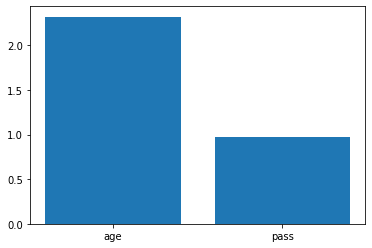

In [8]:
print(attrCatEF.entropy())
print (ds.entropy())

graphics.entropyPlot(ds)

The package also includes a function to compute the variance of a DataDet or Attribute and a function to plot the correlation between the variables of a dataset. The variance function returns a vector with the variance of each column of the DataSet or a value in the case of the Attribute. The correlation is shown in a heatmap where darker blue cells indicate a higher correlation between variables.

1032.0
[1032.0, 7.0376, 0.24000000000000005]
      0     1     2     3     4
0  34.0  16.0  78.0  90.0  12.0
1   1.2   3.4   6.7   8.9   4.7
2   0.0   0.0   1.0   1.0   0.0
          0         1         2         3         4
0  1.000000  0.985250  0.999375  0.998792  0.933031
1  0.985250  1.000000  0.990685  0.992469  0.980837
2  0.999375  0.990685  1.000000  0.999905  0.945171
3  0.998792  0.992469  0.999905  1.000000  0.949586
4  0.933031  0.980837  0.945171  0.949586  1.000000


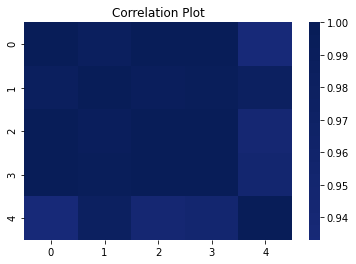

In [9]:
print(attr.variance())
print (ds.variance())
graphics.correlationPlot(ds)

Using the RocAuc function the area behind the ROC curve can be calculated. The RocAuc function takes as parameters: a DataSet, a variable and a class index and returns the area behind the ROC curve. In order to visualize the curve, the function RocPlot plots the Roc curve of the given variable index. In the example the Iris dataset is loaded and the roc

-0.6666666666666667


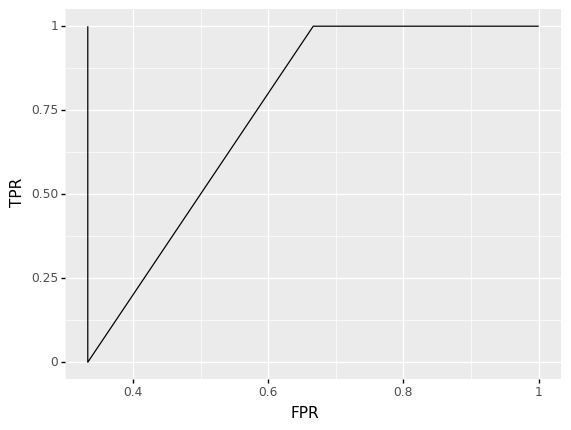

In [12]:
    print(ds.rocAuc(1,2))
graphics.rocPlot(ds,1,2)